# Section 1 - Description

**Describe the dataset you chose. Why did you choose it? What features does it include? What year is it from? How was it collected? What should we know about this dataset as we read your writeup? (4pts)**

This dataset is from kaggle and has 8 years of daily news headlines along with stock price movement. The Dow Jones Industrial Average is a stock market index of 30 prominent companies listed on stock exchanges in the United States. There are historical news headlines crawled from Reddit WorldNews Channel (/r/worldnews). They are ranked by reddit users' votes, and only the top 25 headlines are considered for a single date. The data ranges from 2008-06-08 to 2016-07-01.

Dataset link: https://www.kaggle.com/datasets/aaron7sun/stocknews?datasetId=129

I chose this problem as I have always been interested in NLP and have used it in the past for classifying reviews as positive and negative or news as fake and real but this was a use-case that I haven't really had a chance to look into

**Define a research question. What are you trying to predict? Describe what you're trying to accomplish (it will differ between Supervised and Unsupervised learning). (4pts)**

I am trying to predict stock price movement on the basis of top news headlines with classification algorithms of Naive Bayes and Decision Tree, and possibly Random Forest to improve upon the decision trees. The output will be labels for the stock price movement(1 for up, 0 for down) for the test data.

**Why is this algorithm a good way of answering your research question? (2pts)**

In the previous classes we have used Naive Bayes for NLP problems and so I feel comfortable using it for a similar problem. It can handle high-dimensional and sparse data efficiently and effectively which is why it could work well with vectorized data of NLP. As for decision trees, they can handle complex and non-linear relationships between features and the target variable and this might be a good choice as well.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import string
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud

**Using the data you chose and the algorithm you chose, read in your data and run your model. (6pts)**

In [2]:
df = pd.read_csv('Combined_News_DJIA.csv')

In [3]:
#Checking the shape of the data
df.shape

(1989, 27)

In [4]:
#Looking at the top 5 columns
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

<AxesSubplot:xlabel='Label', ylabel='count'>

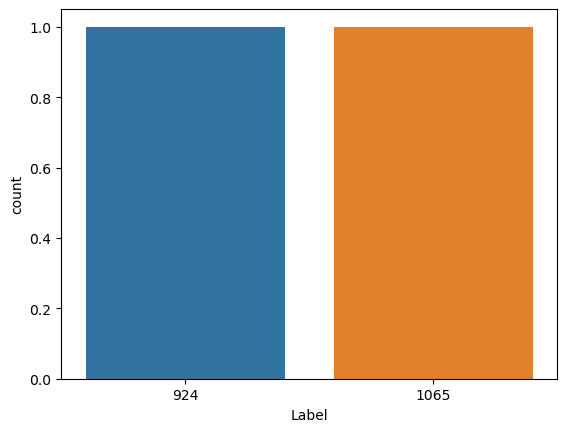

In [5]:
#Looking at the distribution of the target variable
label_counts = df.Label.value_counts()
sns.countplot(x=label_counts.index, data=label_counts)

# Section 2 - Pre Processing Data

In [6]:
#Checking for null values
df.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

In [7]:
#Dropping null values
df.dropna(inplace = True)

In [8]:
#Extracting the features(news headlines columns)
X = df.iloc[:, -25:]

In [9]:
#Checking top 5 columns
X.head()

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',"b""The commander of a Navy air reconnaissance s...","b""92% of CNN readers: Russia's actions in Geor...",...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksande

In [10]:
#Taking one example that we will check at the end of preprocessing to see the changes
example = X.iloc[2,4]
example

"b'Ceasefire in Georgia: Putin Outmaneuvers the West'"

In [11]:
#Function for removing punctuations
def clean(row):
    return str(row).translate(str.maketrans('', '', string.punctuation))

In [12]:
X = X.applymap(clean)

In [13]:
#removing the first letter "b" from all strings
remove_b = lambda x: x[1:]

# apply the lambda function to all string elements of the dataframe
X = X.applymap(lambda x: remove_b(x) if isinstance(x, str) else x)

In [14]:
#removing numbers and special characters as there will be no context after tokenizing 
X = X.replace('\d+', '', regex=True)
X = X.replace('[^\w\s+]', '', regex=True)

In [15]:
#Tokenizing 
def tokenize(row):
    row = word_tokenize(row)
    return row

In [16]:
X = X.applymap(tokenize)

In [17]:
X.head()

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,"[Georgia, downs, two, Russian, warplanes, as, ...","[BREAKING, Musharraf, to, be, impeached]","[Russia, Today, Columns, of, troops, roll, int...","[Russian, tanks, are, moving, towards, the, ca...","[Afghan, children, raped, with, impunity, UN, ...","[Russian, tanks, have, entered, South, Ossetia...","[Breaking, Georgia, invades, South, Ossetia, R...","[The, enemy, combatent, trials, are, nothing, ...","[Georgian, troops, retreat, from, S, Osettain,...","[Did, the, US, Prep, Georgia, for, War, with, ...",...,"[Georgia, Invades, South, Ossetia, if, Russia,...","[AlQaeda, Faces, Islamist, Backlash]","[Condoleezza, Rice, The, US, would, not, act, ...","[This, is, a, busy, day, The, European, Union,...","[Georgia, will, withdraw, soldiers, from, Iraq...","[Why, the, Pentagon, Thinks, Attacking, Iran, ...","[Caucasus, in, crisis, Georgia, invades, South...","[Indian, shoe, manufactory, And, again, in, a,...","[Visitors, Suffering, from, Mental, Illnesses,...","[No, Help, for, Mexicos, Kidnapping, Surge]"
1,"[Why, wont, America, and, Nato, help, us, If, ...","[Bush, puts, foot, down, on, Georgian, conflict]","[Jewish, Georgian, minister, Thanks, to, Israe...","[Georgian, army, flees, in, disarray, as, Russ...","[Olympic, opening, ceremony, fireworks, faked]","[What, were, the, Mossad, with, fraudulent, Ne...","[Russia, angered, by, Israeli, military, sale,...","[An, American, citizen, living, in, SOssetia, ...","[Welcome, To, World, War, IV, Now, In, High, D...","[Georgias, move, a, mistake, of, monumental, p...",...,"[Israel, and, the, US, behind, the, Georgian, ...","[Do, not, believe, TV, neither, Russian, nor, ...","[Riots, are, still, going, on, in, Montreal, C...","[China, to, overtake, US, as, largest, manufac...","[War, in, South, Ossetia, PICS]","[Israeli, Physicians, Group, Condemns, State, ...","[Russia, has, just, beaten, the, United, State...","[Perhaps, the, question, about, the, Georgia, ...","[Russia, is, so, much, better, at, war]","[So, this, is, what, its, come, to, trading, s..."
2,"[Remember, that, adorable, yearold, who, sang,...","[Russia, ends, Georgia, operation]","[If, we, had, no, sexual, harassment, we, woul...","[AlQaeda, is, losing, support, in, Iraq, becau...","[Ceasefire, in, Georgia, Putin, Outmaneuvers, ...","[Why, Microsoft, and, Intel, tried, to, kill, ...","[Stratfor, The, RussoGeorgian, War, and, the, ...","[Im, Trying, to, Get, a, Sense, of, This, Whol...","[The, US, military, was, surprised, by, the, t...","[US, Beats, War, Drum, as, Iran, Dumps, the, D...",...,"[US, troops, still, in, Georgia, did, you, kno...","[Why, Russias, response, to, Georgia, was, right]","[Gorbachev, accuses, US, of, making, a, seriou...","[Russia, Georgia, and, NATO, Cold, War, Two]","[Remember, that, adorable, yearold, who, led, ...","[War, in, Georgia, The, Israeli, connection]","[All, signs, point, to, the, US, encouraging, ...","[Christopher, King, argues, that, the, US, and...","[America, The, New, Mexico]","[BBC, NEWS, AsiaPacific, Extinction, by, man, ..."
3,"[US, refuses, Israel, weapons, to, attack, Ira...","[When, the, president, ordered, to, attack, Ts...","[Israel, clears, troops, who, killed, Reuters,...","[Britains, policy, of, being, tough, on, drugs...","[Body, of, year, old, found, in, trunk, Latest...","[China, has, moved, million, quake, survivors,...","[Bush, announces, Operation, Get, All, Up, In,...","[Russian, forces, sink, Georgian, ships]","[The, commander, of, a, Navy, air, reconnaissa...","[of, CNN, readers, Russias, actions, in, Georg...",...,"[Elephants, extinct, by]","[US, humanitarian, missions, soon, in, Georgia...","[Georgias, DDOS, came, from, US, sources]","[Russian, convoy, heads, into, Georgia, violat...","[Israeli, defence, minister, US, against, stri...","[Gorbachev, We, Had, No, Choice]","[Witness, Russian, forces, head, towards, Tbil...","[Quarter, of, Russian

In [18]:
#Setting lowercase
X = X.applymap(lambda x: [y.lower() if isinstance(y, str) else y for y in x] if isinstance(x, list) else x.lower() if isinstance(x, str) else x)


In [19]:
#Removing stop words and lemmatizing

stopeng = set(stopwords.words('english')) #set language

#define a function to remove stopwords
def remove_stopwords(row):
    row = [w for w in row if w not in stopeng]
    return row

lmtzr = WordNetLemmatizer()

# define function to lemmatize
def lemmatize(row):
    row = [lmtzr.lemmatize(token) for token in row]
    row = ' '.join(row) 
    return row

In [20]:
X = X.applymap(remove_stopwords)
X = X.applymap(lemmatize)

In [21]:
X.head()

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,georgia down two russian warplane country move...,breaking musharraf impeached,russia today column troop roll south ossetia f...,russian tank moving towards capital south osse...,afghan child raped impunity un official say si...,russian tank entered south ossetia whilst geor...,breaking georgia invades south ossetia russia ...,enemy combatent trial nothing sham salim haman...,georgian troop retreat osettain capital presum...,u prep georgia war russia,...,georgia invades south ossetia russia get invol...,alqaeda face islamist backlash,condoleezza rice u would act prevent israeli s...,busy day european union approved new sanction ...,georgia withdraw soldier iraq help fight russi...,pentagon think attacking iran bad idea u news ...,caucasus crisis georgia invades south ossetia,indian shoe manufactory series like work,visitor suffering mental illness banned olympics,help mexico kidnapping surge
1,wont america nato help u wont help u help iraq,bush put foot georgian conflict,jewish georgian minister thanks israeli traini...,georgian army flees disarray russian advance g...,olympic opening ceremony firework faked,mossad fraudulent new zealand passport iraq,russia angered israeli military sale georgia,american citizen living sossetia blame u georg...,welcome world war iv high definition,georgia move mistake monumental proportion,...,israel u behind georgian aggression,believe tv neither russian georgian much victim,riot still going montreal canada police murder...,china overtake u largest manufacturer,war south ossetia pic,israeli physician group condemns state torture,russia beaten united state head peak oil,perhaps question georgia russia conflict,russia much better war,come trading sex food
2,remember adorable yearold sang opening ceremon...,russia end georgia operation,sexual harassment would child,alqaeda losing support iraq brutal crackdown a...,ceasefire georgia putin outmaneuvers west,microsoft intel tried kill xo laptop,stratfor russogeorgian war balance power,im trying get sense whole georgiarussia war vo...,u military surprised timing swiftness russian ...,u beat war drum iran dump dollar,...,u troop still georgia know georgia first place,russia response georgia right,gorbachev accuses u making serious blunder pur...,russia georgia nato cold war two,remember adorable yearold led country war base...,war georgia israeli connection,sign point u encouraging georgia invade south ...,christopher king argues u nato behind georgian...,america new mexico,bbc news asiapacific extinction man climate
3,u refuse israel weapon attack iran report,president ordered attack tskhinvali capital so...,israel clear troop killed reuters cameraman,britain policy tough drug pointless say former...,body year old found trunk latest ransom paid k...,china moved million quake survivor prefab home,bush announces operation get russia grill yeah...,russian force sink georgian ship,commander navy air reconnaissance squadron pro...,cnn reader russia action georgia justified,...,elephant extinct,u humanitarian mission soon georgia russia hit...,georgia ddos came u source,russian convoy head georgia violating truce,israeli defence minister u strike iran,gorbachev choice,witness russian force head towards tbilisi bre...,quarter russian blame u conflict poll,georgian president say u military take control...,nobel laureate aleksander solzhenitsyn accuses...
4,expert admit legalise drug,war south osetia picture made russian soldier,swedish wrestler ara abrahamian throw away med...,russia exaggerated death toll south ossetia or...,missile killed inside pakistan may launched cia,rushdie condemns random house refusal publish ...,poland u agree missle defense deal interesting...,russian conquer tblisi bet seriously bet,russia exaggerating south ossetian death toll ...,musharraf expected resign rather face impeachment,...,bank analyst forecast georgi

In [22]:
#Looking at the previous example to see what changes have taken place
example_new = X.iloc[2,4]
example_new

'ceasefire georgia putin outmaneuvers west'

In [23]:
X.shape

(1986, 25)

In [24]:
#Extracting the target variable
y = df['Label']

# Section 3 - Vectorizing and preparing for modeling

In [25]:
#Creating TFIDF vectorizer object
vectorizer = TfidfVectorizer()

In [26]:
# loop over the text columns and create a separate tf-idf matrix for each one
tfidf_matrices = []
for col in X.columns[1:]:
    tfidf_matrix = vectorizer.fit_transform(X[col])
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    tfidf_df = tfidf_df.set_index(X.index)
    tfidf_matrices.append(tfidf_df)

# concatenate the tf-idf matrices into a single DataFrame
tfidf_df = pd.concat(tfidf_matrices, axis=1)

# display the tf-idf DataFrame
print(tfidf_df.head())

   aamir  abandon  abandoned  abandoning  abbott  abc  abdicates  abduct  \
0    0.0      0.0        0.0         0.0     0.0  0.0        0.0     0.0   
1    0.0      0.0        0.0         0.0     0.0  0.0        0.0     0.0   
2    0.0      0.0        0.0         0.0     0.0  0.0        0.0     0.0   
3    0.0      0.0        0.0         0.0     0.0  0.0        0.0     0.0   
4    0.0      0.0        0.0         0.0     0.0  0.0        0.0     0.0   

   abducted  abduction  ...  zika  zimbabwe  zionism  zionist  zliten  zoabi  \
0       0.0        0.0  ...   0.0       0.0      0.0      0.0     0.0    0.0   
1       0.0        0.0  ...   0.0       0.0      0.0      0.0     0.0    0.0   
2       0.0        0.0  ...   0.0       0.0      0.0      0.0     0.0    0.0   
3       0.0        0.0  ...   0.0       0.0      0.0      0.0     0.0    0.0   
4       0.0        0.0  ...   0.0       0.0      0.0      0.0     0.0    0.0   

   zone  zoo  zuckerberg  zuckerburg  
0   0.0  0.0         0.

In [27]:
#Splitting dataset into train and test sets

x_train, x_test, y_train, y_test = train_test_split(tfidf_df, y, test_size=0.2, random_state=77)

In [28]:
x_train.shape

(1588, 170942)

# Section 4 - Training the Models

In [29]:
#Running a multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
y_pred = mnb.predict(x_test)
print(y_pred)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0
 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1
 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1]


In [30]:
#Reporting accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.5226130653266332


In [31]:
#Runnig Decision Tree Model
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred_2 = clf.predict(x_test)
print(y_pred_2)

[0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0
 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0
 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0
 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0
 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1
 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1
 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1
 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0
 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1]


In [32]:
accuracy = accuracy_score(y_test, y_pred_2)
print('Accuracy:', accuracy)

Accuracy: 0.5025125628140703


As we can see the accuracy is not that great so we will try to improve the decision tree with an added feature of 'sentiment score' from the sentimentanalyzer library 

In [33]:
sia = SentimentIntensityAnalyzer()

In [34]:
#Function for getting sentiment score
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

In [35]:
#Loop to apply the sentiment score to every column
for col in X.columns:
    if X[col].dtype == 'object':
        X[col+'_sentiment'] = X[col].apply(get_sentiment_score)

In [36]:
#Extracting only the numerical columns
X_sentiment = X.iloc[:,25:]
X_sentiment.head()

,Top1_sentiment,Top2_sentiment,Top3_sentiment,Top4_sentiment,Top5_sentiment,Top6_sentiment,Top7_sentiment,Top8_sentiment,Top9_sentiment,Top10_sentiment,...,Top16_sentiment,Top17_sentiment,Top18_sentiment,Top19_sentiment,Top20_sentiment,Top21_sentiment,Top22_sentiment,Top23_sentiment,Top24_sentiment,Top25_sentiment
0,-0.5994,0.0000,-0.3612,-0.7089,-0.9260,-0.3400,-0.2732,-0.2732,-0.5719,-0.5994,...,-0.5994,0.0000,-0.3612,0.2023,0.0258,-0.7579,-0.6249,0.3612,-0.8316,0.4019
1,-0.6979,-0.3182,0.4404,-0.1965,0.0000,-0.4939,-0.5106,0.0000,-0.2263,-0.3400,...,-0.2960,-0.2732,-0.8402,0.0000,-0.5994,-0.8020,0.0000,-0.3182,-0.2500,0.0000
2,0.0258,0.0000,-0.5423,-0.6124,0.0000,-0.6908,-0.5994,-0.5994,0.3400,-0.7579,...,0.0000,0.0000,0.0772,-0.5994,-0.5859,-0.5994,0.5267,0.0000,0.0000,0.0000
3,-0.7579,-0.8074,-0.4404,-0.1280,-0.5106,0.3612,0.5106,0.0000,0.4939,0.4019,...,0.0000,0.0000,0.0000,-0.5423,-0.0258,0.0000,0.4939,-0.5719,-0.4215,-0.3400
4,0.2023,-0.5994,0.6808,-0.8689,-0.6124,-0.6369,0.6908,-0.1779,-0.6808,-0.3400,...,-0.6249,0.0000,-0.7351,-0.3182,0.0000,-0.4404,-0.5994,0.1779,-0.6705,0.7096


In [37]:
#Combining the TFIDF datafrme with the sentiment scores
X_new = pd.concat([tfidf_df, X_sentiment], axis = 1)

In [38]:
X_new.shape

(1986, 170967)

In [39]:
#Splitting the dataset
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X_new, y, test_size=0.2, random_state=77)

In [41]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=2, min_samples_split = 3)
clf.fit(x_train_2, y_train_2)
y_pred_4 = clf.predict(x_test_2)

In [42]:
accuracy = accuracy_score(y_test_2, y_pred_4)
print('Accuracy:', accuracy)

Accuracy: 0.5452261306532663


In [ ]:
# #Using GridSearchCV
# from sklearn.model_selection import GridSearchCV
# # Define the parameter space to search over
# param_grid = {
#     'max_depth': [2, 4, 6],
#     'min_samples_split': [2, 4, 6],
#     'min_samples_leaf': [1, 2, 3],
#     'criterion': ['gini', 'entropy'],
# }

# # Create an instance of GridSearchCV
# grid_search = GridSearchCV(clf, param_grid, cv=5)

# # Fit the GridSearchCV object to the data
# grid_search.fit(x_train, y_train)

# # Print the best parameter values and corresponding accuracy
# print("Best parameters: ", grid_search.best_params_)
# print("Best accuracy: ", grid_search.best_score_)

I tried using gridsearch to find the best parameters but with the huge dataset we have this became very computationally expensive and the jupyter kernel could not handle it

Now using random forest ensemble to try and improve the accuracy of the decision tree

**Tinker with parameters at least 3 times**

In [43]:
# Create a Random Forest Classifier object and fit it to the training data

rfc = RandomForestClassifier(n_estimators=100, random_state=77)
rfc.fit(x_train_2, y_train_2)

# Predict the classes of the testing data
y_pred_5 = rfc.predict(x_test_2)

# Calculate the accuracy of the predictions
accuracy_2 = accuracy_score(y_test, y_pred_5)
print('Accuracy:', accuracy_2)

Accuracy: 0.5301507537688442


In [45]:
rfc2 = RandomForestClassifier(n_estimators=200, random_state=17)

In [46]:
rfc2.fit(x_train_2, y_train_2)

# Predict the classes of the testing data
y_pred_6 = rfc2.predict(x_test_2)

# Calculate the accuracy of the predictions
accuracy_3 = accuracy_score(y_test, y_pred_6)
print('Accuracy:', accuracy_3)

Accuracy: 0.5326633165829145


In [47]:
rfc_new = RandomForestClassifier(n_estimators=1000, max_depth = 6, criterion = 'entropy', random_state=4)

In [48]:
rfc_new.fit(x_train_2, y_train_2)

# Predict the classes of the testing data
y_pred_new = rfc_new.predict(x_test_2)

accuracy_new = accuracy_score(y_test, y_pred_new)
print('Accuracy:', accuracy_new)

Accuracy: 0.5527638190954773


**Report the accuracy of your model. Either through RMSE or another metric. How did accuracy change with your parameter tinkering? (3pts)**

In [49]:
print("The accuracy of the final model was:", accuracy_new * 100)
print("While the accuracy was almost similar for the first two times I tinkered with the parameters, it increased by 2% for the third iteration of the tinkering")

The accuracy of the final model was: 55.27638190954774
While the accuracy was almost similar for the first two times I tinkered with the parameters, it increased by 2% for the third iteration of the tinkering


# Section 5 - Visualizations

**Create a visualization demonstrating your findings. Make sure to include a title and axis labels. Describe what's being shown in your visualization. (3pts)**

In [50]:
#Creating a wordcloud
text = ' '.join([df[col].astype(str).str.cat(sep=' ') for col in df.columns])
wordcloud = WordCloud(width=1000, height=1000, background_color='white', max_words=500, contour_width=3, contour_color='steelblue')
wordcloud.generate(text)

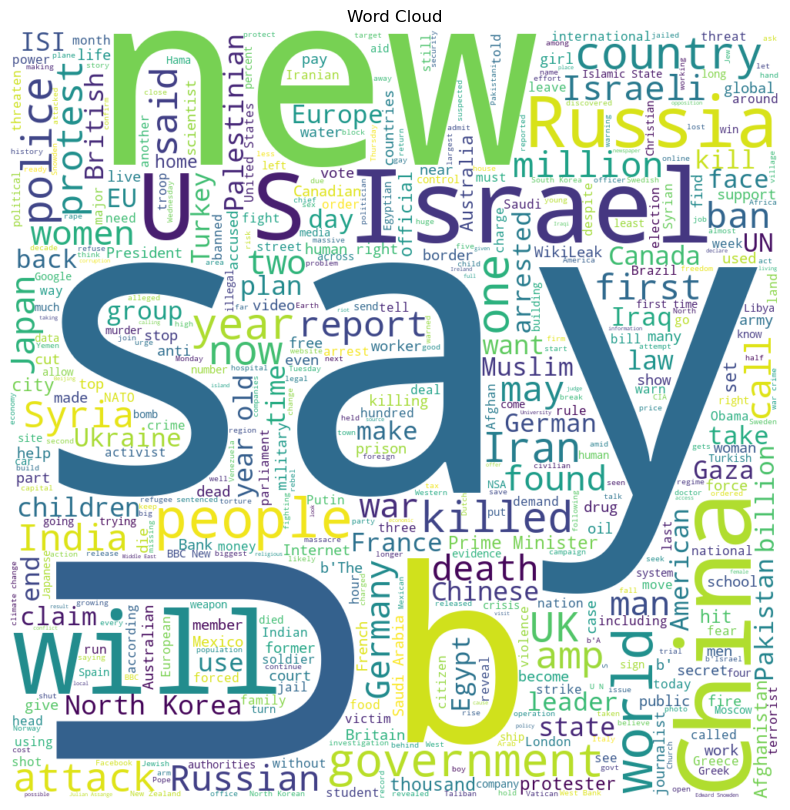

In [51]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud")
plt.axis('off')
plt.show()

This plot shows the top words in the cleaned dataset, bigger words are the ones which appeared most often. There are no meaningful axis for a wordcloud plot.

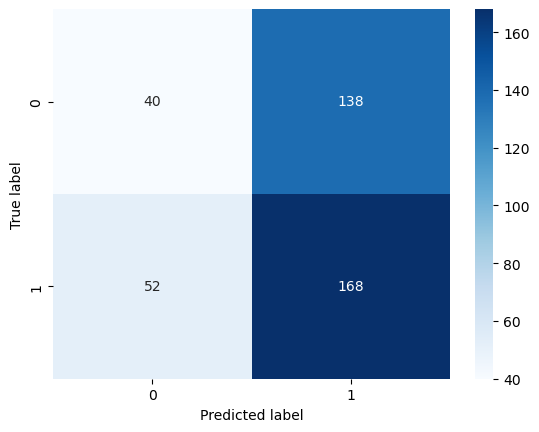

In [52]:
#Creating a confusion matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

The confusion matrix (cm) is a table that shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) for each class to summarise the performance of a classification model. IN our case we can see majority of the labels are predicted as 1 which is causing accuracy to go down as there are many false positives(138). 

# Section 6 - Follow up questions

**What challenges did you run into? Do you think it was because of the data, the model, the research question? How would you overcome these challenges? (4pts)**

The major challenge was the accuracy which I feel might be because there is not that signicficant a correllation between the features and the target variable. I. also referenced some other notebooks on kaggle which tried to solve the same problem but they also struggled with accuracy. One way to overcome this challenge might be to only include news headlines that are relevant to the stock price movement, for instance news related to finance or government policy changes etc

**We learned a little bit about how our models can affect real people in the world. Name 2 potential benefits of your model and 2 potential harms. You can even look at the Wikipedia page on Algorithmic Bias for inspiration. Every model has consequences, what can you think of? If your data is really not amenable to this question, simply write about any other example we covered in class, such as the Boston housing dataset or hate speech detectors. (6pts)**

Benefits: 

1. Better Investment Decisions: If the model successfully predicts stock prices, it can assist investors in making educated decisions about when to buy and sell stocks, perhaps resulting in higher returns on their investments. 
2. Improved Market Efficiency: With more accurate stock price projections, the market may become more efficient as investors make more informed decisions, resulting in better resource allocation and potentially lowering market volatility. 

Harms: 

1. Unintended Consequences: Using an NLP algorithm to predict stock prices may have unforeseen implications, such as a decline in investment diversification as investors flock to the same stocks anticipated to have the highest returns. 
2. Unequal Access: Individuals who have access to the NLP algorithm may have an unfair edge over others, perhaps leading to market disparities and worsening existing inequalities.

**Name one research question you might ask next for future work (don't worry, you don't have to do it!) Why is it important? (2pts)**

One possible question can be predicting how much the stock moves instead of just what direction it moves in. We could use time series forecasting models like ARIMA to achieve this. It is important because it is more valuable to investors than just the direction. If a stock is going to move significantly in either direction that is a major piece of information they can use to increase profits as they can go for a large volume on those at either long or short positions.